<a href="https://colab.research.google.com/github/VinayakDubey07/Deep-Learning-Concepts/blob/main/dl_lab_u5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
def g_t_s(batch_size, n_steps):
  freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offset2) * (freq1 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[...,np.newaxis].astype(np.float32)


In [ ]:
n_steps = 50
series = g_t_s(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

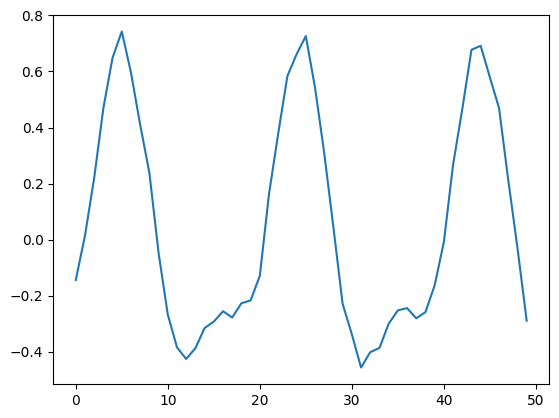

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_train[0].reshape(-1))

In [ ]:
y_pred = X_valid[:, 1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.26410627

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

In [9]:
model.compile(loss="mse",optimizer="adam")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
